# Assignment2

두번째 과제는 `Binary Classification`과 `Multiclass Classification`입니다.

## 1 - Pacakges
- [numpy](www.numpy.org)는 Python에서 행렬 연산 작업을 위한 기본 패키지입니다.
- [matplotlib](http://matplotlib.org)는 Python에서 그래프 및 다양한 시각화를 도와주는 라이브러리입니다.

In [172]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mplcolors
import sklearn.datasets as skdata
from sklearn.model_selection import train_test_split
import math

%matplotlib inline

## 1. Binary Classification

이번 과제에서는 [위스콘신 유방암 데이터세트](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)를 이용하여 Binary Classification을 구현합니다.
강의에서 배운 Logistic Regression 모델을 활용하여 환자가 Benign(양성 종양)인지 Malignant(악성 종양)인지 판별합시다.

In [173]:
# Load Wisconsin breast cancer dataset
def load_breast_cancer(normalize):
    # https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
    X, y = skdata.load_breast_cancer(return_X_y=True)
    y = y.reshape(-1, 1)
    if normalize:
        X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    return train_test_split(X, y, test_size=0.2, random_state=444)

# Method for plotting the loaded dataset
def plot_data(X, y, pos_label="y=1", neg_label="y=0"):
    positive = y == 1
    negative = y == 0
    
    # Plot examples
    plt.plot(X[positive, 0], X[positive, 1], 'k+', label=pos_label)
    plt.plot(X[negative, 0], X[negative, 1], 'yo', label=neg_label)

In [174]:
X_train, X_test, y_train, y_test = load_breast_cancer(normalize=True)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (455, 30)
Shape of y_train: (455, 1)
Shape of X_test: (114, 30)
Shape of y_test: (114, 1)


X_train은 총 455개의 data로 이루어져있으며 각 데이터는 30개의 feature를 가집니다. 
이번 과제에서는 그중 2개의 feature만을 사용합니다.

In [175]:
# Randomly pick two features for the visualization
X_train = X_train[:, [0, 4]]
X_test = X_test[:, [0, 4]]

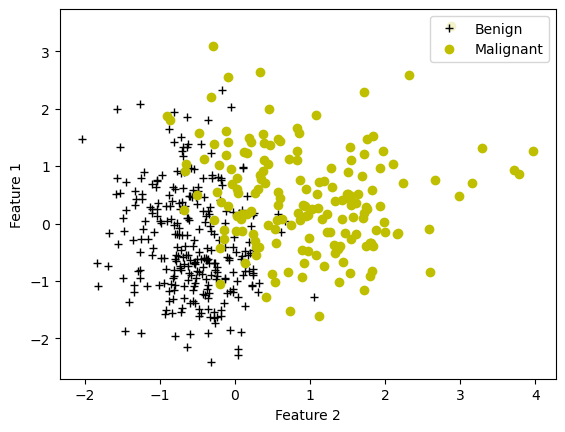

In [176]:
plot_data(X_train, y_train[:,0], pos_label="Benign", neg_label="Malignant")

plt.ylabel("Feature 1")
plt.xlabel("Feature 2")
plt.legend(loc="upper right")
plt.show()

### Sigmoid function

$$sigmoid(x) = \frac{1}{1+e^{-x}}$$

In [177]:
# >>> Complete the code
def sigmoid(x):
    """
    Compute the sigmoid of x
    """
    sigma = None

    # Q1: Make sigmoid function
    # Code start here

    sigma = 1/(1+np.exp(-x))

    return sigma

# <<< Complete the code

### Binary cross-entropy loss

$$\hat{y}^{(i)} = \sigma(w^T x^{(i)} + b)$$

$$-\frac{1}{N} \sum_{i=1}^{N} y^{(i)} \cdot log(\hat{y}^{(i)}) + (1-y^{(i)}) \cdot log(1-\hat{y}^{(i)})$$

* N is the number of training examples in the dataset

In [178]:
# >>> Complete the code
def compute_bce_loss(X, y, w, b):
    """
    Compute the bce loss over all examples
    Args:
      X : (ndarray Shape (n,m)) data, n examples by m features
      y : (array_like Shape (n,)) target value 
      w : (array_like Shape (m,)) Values of parameters of the model      
      b : scalar Values of bias parameter of the model
    Returns:
      Binary cross-entropy loss: (Scalar)
    """
    n, m = X.shape
    bce_loss = None
    
    # Q2: Make binary cross entropy loss
    # Code start here

    y_hat = sigmoid(X @ w + b)
    bce_loss = -np.sum(y * np.log(y_hat) + (1-y) * np.log(1-y_hat))/n
    
    return bce_loss

# <<< Complete the code

In [179]:
np.random.seed(1)
n, m = X_train.shape

w_init = np.zeros(m)
b_init = 0.
loss = compute_bce_loss(X_train, y_train, w_init, b_init)
print('Loss at initial values: {:.3f}'.format(loss.item()))

Loss at initial values: 315.382


### Compute gradients

$$
\frac{\partial L(\mathbf{w},b)}{\partial w_j}  = \frac{1}{N} \sum\limits_{i = 0}^{N-1} (\hat{y}^{(i)} - {y}^{(i)})x_{j}^{(i)}
$$
$$
\frac{\partial L(\mathbf{w},b)}{\partial b}  = \frac{1}{N} \sum\limits_{i = 0}^{N-1} (\hat{y}^{(i)} - {y}^{(i)})
$$
* N is the number of training examples in the dataset

In [180]:
# >>> Complete the code
def compute_gradient(X, y, w, b):
    """
    Computes the gradient
    Args:
      X : (ndarray Shape (n, m)) variable such as house size 
      y : (array_like Shape (n,)) actual value 
      w : (array_like Shape (m,)) values of parameters of the model      
      b : (scalar)                 value of parameter of the model 
    Returns
      dj_dw: (array_like Shape (n,)) The gradient of the cost w.r.t. the parameters w. 
      dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b. 
    """

    n, m = X.shape
    dl_dw = np.zeros(w.shape)
    dl_db = 0.
    # Q3: Make gradient function
    # Code start here 
    
    w = np.reshape(w, (w.shape[0],1))
    
    dif = sigmoid((X @ w) + b) - y
    dl_dw = np.sum(dif * X, axis=0, keepdims=True)/n
    dl_db = np.sum(dif)/n   
    dl_dw = dl_dw.T

    return dl_dw, dl_db

# <<< Complete the code

In [181]:
np.random.seed(1)
n, m = X_train.shape

w_init = np.zeros(m)
b_init = 0.
dl_dw, dl_db = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dl_dw at initial values:{dl_dw.tolist()}')
print(f'dl_db at initial values:{dl_db}')

dl_dw at initial values:[[0.3567408582615215], [0.1824996134922572]]
dl_db at initial values:-0.12417582417582418


### Gradient descent

In [182]:
def gradient_descent(X, y, w, b, loss_func, grad_func, lr, num_iters):
    """
    Perform gradient descent
    Args:
      X :    (array_like Shape (n, m)
      y :    (array_like Shape (n,))
      w : (array_like Shape (m,))  Initial values of parameters of the model
      b : (scalar)                 Initial value of parameter of the model
      loss_func :                  function to compute bce_loss
      grad_func :                  function to compute gradient
      lr : (float)                 Learning rate
      num_iters : (int)            number of iterations to run gradient descent    

    Returns:
      w, b : final updated parameters
    """
    
    log_every = 500

    for i in range(1, num_iters+1):
        
        dl_dw, dl_db = grad_func(X, y, w, b)

        w = w - lr * dl_dw
        b = b - lr * dl_db

        if i % log_every == 0:
          y_hat = sigmoid(X_train @ w + b)
          acc = np.mean(np.round(y_hat) == y_train)
          loss = loss_func(X_train, y_train, w, b)
          print(f'Epochs: {i}/{num_iters}, loss (train): {loss.item():.4f}, accuracy (train): {acc:.4f}')

    return w, b

In [183]:
np.random.seed(1)
w_init = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
b_init = -8

iterations = 10000
lr = 0.005

w,b = gradient_descent(X_train, y_train, w_init, b_init, compute_bce_loss, compute_gradient, lr, iterations)


Epochs: 500/10000, loss (train): 3.6130, accuracy (train): 0.3758
Epochs: 1000/10000, loss (train): 2.2834, accuracy (train): 0.3758
Epochs: 1500/10000, loss (train): 1.2829, accuracy (train): 0.4462
Epochs: 2000/10000, loss (train): 0.7690, accuracy (train): 0.6484
Epochs: 2500/10000, loss (train): 0.5235, accuracy (train): 0.7648
Epochs: 3000/10000, loss (train): 0.3963, accuracy (train): 0.8022
Epochs: 3500/10000, loss (train): 0.3259, accuracy (train): 0.8374
Epochs: 4000/10000, loss (train): 0.2851, accuracy (train): 0.8703
Epochs: 4500/10000, loss (train): 0.2607, accuracy (train): 0.8923
Epochs: 5000/10000, loss (train): 0.2458, accuracy (train): 0.8989
Epochs: 5500/10000, loss (train): 0.2364, accuracy (train): 0.9011
Epochs: 6000/10000, loss (train): 0.2303, accuracy (train): 0.9033
Epochs: 6500/10000, loss (train): 0.2264, accuracy (train): 0.9055
Epochs: 7000/10000, loss (train): 0.2239, accuracy (train): 0.9143
Epochs: 7500/10000, loss (train): 0.2221, accuracy (train): 0.9

In [184]:
def plot_decision_boundary(w, b, X, y):
     
    plot_data(X[:, 0:2], y)
    
    plot_x = np.array([min(X[:, 0]), max(X[:, 0])])
    plot_y = ((-1. / w[1]) * (w[0] * plot_x + b))/3 # for practical normalization

    
    plt.plot(plot_x, plot_y, c="b")

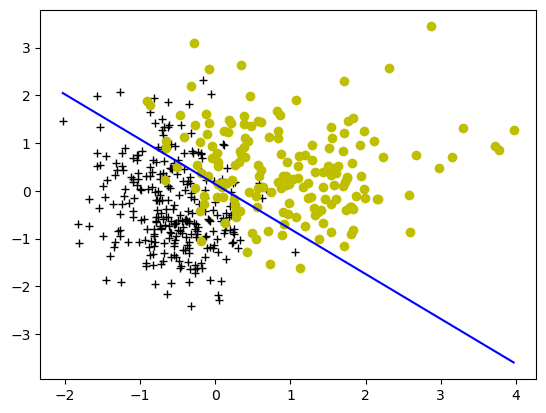

In [185]:
plot_decision_boundary(w, b, X_train, y_train[:,0])

## 2. Multiclass Classification

Multiclass Classification 학습을 위해 [아이리스 데이터세트](https://scikit-learn.org/1.5/auto_examples/datasets/plot_iris_dataset.html)를 사용합니다. 각 아이리스 꽃이 Setosa, Versicolour, Virginica 중 어떤 종류에 해당 하는지 분류하는 모델을 만들어봅시다.

In [186]:
# Load iris dataset (we're only going to use 1st & 3rd features for our practice)
def load_iris(normalize):
    # import data
    X, y = skdata.load_iris(return_X_y=True)
    # only use 1st & 3rd features
    X = X[:, [0, 2]]
    if normalize:
        X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    return train_test_split(X, y, test_size=0.2, random_state=444)

# Method for plotting the loaded dataset
def plot_iris(X, y, x1_mesh=None, x2_mesh=None, y_mesh=None):
    x1, x2 = X[:, 0], X[:, 1]
    plt.figure(figsize=(10, 6))
    plt.scatter(x1[y==0], x2[y==0], c='tab:blue', marker='o', label='Setosa')
    plt.scatter(x1[y==1], x2[y==1], c='tab:orange', marker='^', label='Versicolour')
    plt.scatter(x1[y==2], x2[y==2], c='tab:green', marker='x', label='Virginica')
    if x1_mesh is not None:
        cmap = mplcolors.ListedColormap(['tab:blue', 'tab:orange', 'tab:green'])
        plt.contourf(x1_mesh, x2_mesh, y_mesh, levels=3, cmap=cmap, alpha=0.3)
    plt.title('Softmax Regression (Iris dataset)', fontsize=18, pad=12)
    plt.xlabel('x1: Sepal length', fontsize=16, labelpad=12) # 1st feat
    plt.ylabel('x2: Petal length', fontsize=16, labelpad=12) # 3rd feat
    plt.legend(fontsize=14, loc='upper left')
    plt.show()

In [187]:
X_train, X_test, y_train, y_test = load_iris(normalize=True)
print(f"{X_train.shape}: Shape of X_train")
print(f"{y_train.shape}: Shape if y_train")

(120, 2): Shape of X_train
(120,): Shape if y_train


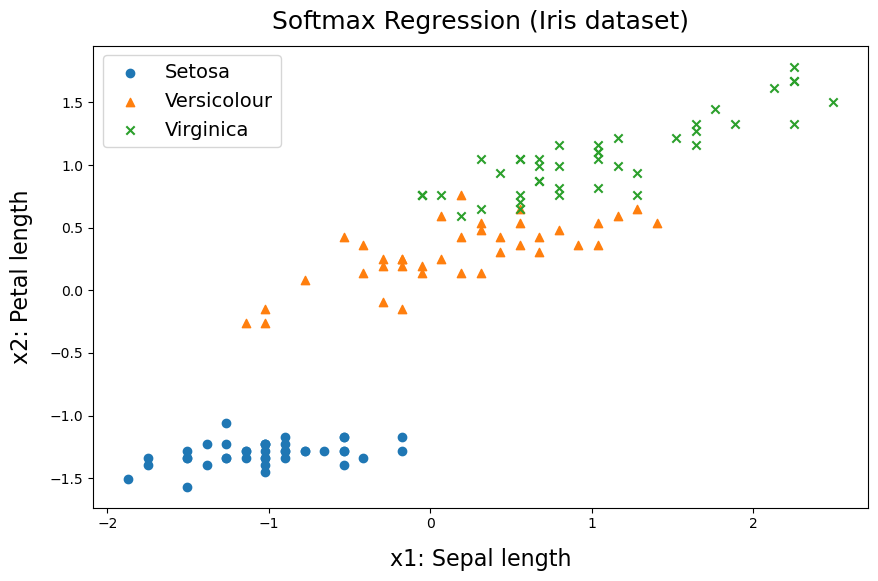

In [188]:
plot_iris(X_train, y_train)

이전의 내용을 바탕으로 softmax를 활용하는 multiclass classification을 진행합니다.

### Affine function

$$z^{(i)} = w^T x^{(i)} + b \quad \text{or} \quad z = Xw + b \text{(using brodcasting)}$$

In [189]:
# >>> Complete the code
def affine(x, w, b):
    """
    Affine function
    """
    
    z = None

    # Q4: Make affine function 
    # Code start here

    z = x @ w + b
    
    cache = (x, w, b)
    
    return z, cache

# <<< Complete the code

### Backward for affine

##### Hint: Chain rule를 고려하여 코드를 작성해주시면 됩니다.

ex) dL/dw = dL/dz $\cdot$ dz/dw

In [190]:
# >>> Complete the code
def affine_backward(dout, cache):
    """
    Compute the gradient w.r.t weights, and biases.
    """
    x, w, b = cache
    dw, db = None, None

    # Q5: Make backward gradient for the affine function
    # Code start here
    
    dw = x.T @ dout
    db = np.sum(dout, axis=0)

    return dw, db

# <<< Complete the code

### Softmax

In [191]:
# >>> Complete the code
def softmax(x):
    """
    Compute the softmax function
    """
    y_hat = None
    
    # Q6: Make softmax function
    # Code start here

    y_hat = np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

    return y_hat

# <<< Complete the code

### Onehot vector
make onehot vector

In [192]:
def one_hot(x, n_class):
	return np.eye(n_class)[x]

### Cross entropy loss

$$\operatorname{CE}(w)=- \frac{1}{N} \sum_{i=1}^N \sum_{c=1}^C y_c^{(i)} \log \left(\hat{y}_c{ }^{(i)}\right)$$

In [193]:
# >>> Complete the code
def cross_entropy_loss(y_hat, y, n_class):
    """
    Compute the cross entrioy loss
    """
    loss = None
    
    # Q7: Make cross entropy loss
    # Code start here
    
    loss = -np.sum(np.log(y_hat) * one_hot(y,n_class))/y.shape[0]
    
    return loss

# <<< Complete the code

In [194]:
def cross_entropy_loss_and_grad(z, y, n_class):
    yhat = softmax(z)
    loss = cross_entropy_loss(yhat, y, n_class)
    grad = yhat - one_hot(y, n_class)
    return loss, grad

### Train the model

In [195]:
def train_softmax_regression(x_train, x_test, y_train, y_test, lr, num_iters, log_every):
    np.random.seed(1)
    _, in_features = x_train.shape
    out_features = len(np.unique(y_train))
    # initialize weights
    w = np.random.rand(in_features, out_features)
    b = np.zeros(out_features)
    # begin training
    for i in range(1, num_iters+1):
        # forward affine (out = wx + b)
        out, cache = affine(x_train, w, b)
        # compute cross-entropy loss and grad (dL/dout)
        loss, dout = cross_entropy_loss_and_grad(out, y_train, out_features)
        # backward affine
        dw, db = affine_backward(dout, cache)
        # gradient descent
        w -= lr * dw
        b -= lr * db

        if i % log_every == 0:
            yhat = softmax(affine(x_test, w, b)[0])
            acc = np.mean(np.argmax(yhat, axis=1) == y_test)
            loss = cross_entropy_loss(yhat, y_test, out_features)
            print(f'Epochs: {i}/{num_iters}, loss (test): {loss:.4f}, accuracy (test): {acc:.4f}')
    return w, b

In [196]:
w, b = train_softmax_regression(X_train, X_test, y_train, y_test, lr=1e-2, num_iters=400, log_every=20)

Epochs: 20/400, loss (test): 0.4735, accuracy (test): 0.7333
Epochs: 40/400, loss (test): 0.4118, accuracy (test): 0.7333
Epochs: 60/400, loss (test): 0.3708, accuracy (test): 0.8000
Epochs: 80/400, loss (test): 0.3402, accuracy (test): 0.8000
Epochs: 100/400, loss (test): 0.3166, accuracy (test): 0.8667
Epochs: 120/400, loss (test): 0.2982, accuracy (test): 0.8667
Epochs: 140/400, loss (test): 0.2834, accuracy (test): 0.8667
Epochs: 160/400, loss (test): 0.2714, accuracy (test): 0.8667
Epochs: 180/400, loss (test): 0.2615, accuracy (test): 0.9000
Epochs: 200/400, loss (test): 0.2532, accuracy (test): 0.9000
Epochs: 220/400, loss (test): 0.2461, accuracy (test): 0.9000
Epochs: 240/400, loss (test): 0.2400, accuracy (test): 0.9000
Epochs: 260/400, loss (test): 0.2348, accuracy (test): 0.9000
Epochs: 280/400, loss (test): 0.2302, accuracy (test): 0.9000
Epochs: 300/400, loss (test): 0.2261, accuracy (test): 0.9000
Epochs: 320/400, loss (test): 0.2225, accuracy (test): 0.9000
Epochs: 340/

In [197]:
def compute_decision_boundary(x, w, b, resolution):
    x1, x2 = x[:, 0], x[:, 1]
    x1_mesh = np.linspace(np.min(x1) - 0.1, np.max(x1) + 0.1, resolution)
    x2_mesh = np.linspace(np.min(x2) - 0.1, np.max(x2) + 0.1, resolution)
    x1_mesh, x2_mesh = np.meshgrid(x1_mesh, x2_mesh, indexing='xy')
    x = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]
    y_mesh = np.argmax(softmax(affine(x, w, b)[0]), axis=1)
    y_mesh = y_mesh.reshape(resolution, resolution)
    return x1_mesh, x2_mesh, y_mesh

In [198]:
x1_mesh, x2_mesh, y_mesh = compute_decision_boundary(X_test, w, b, resolution=500)

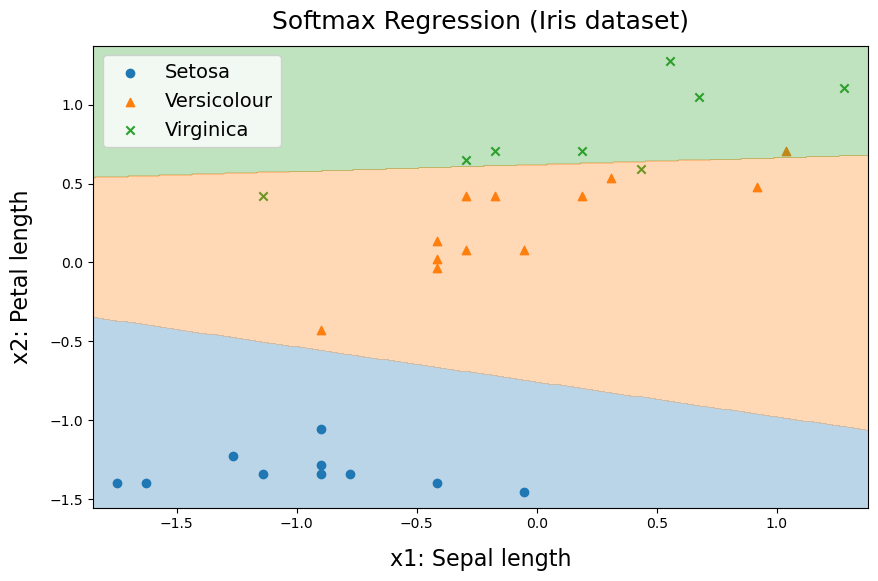

In [199]:
plot_iris(X_test, y_test, x1_mesh, x2_mesh, y_mesh)